In [ ]:
!pip install alpha_vantage
!pip install --upgrade statsmodels
!pip install prophet

In [ ]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# The google drive mounting is for using local library

In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Insert the directory to syspath
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')

In [ ]:
from time_series_utils import timeseries_evaluation_metrics_func, timeseries_RMSE_calc, \
                          create_proph_train_test, find_best_Prophet_model, \
                          find_best_ETS_model, find_best_ARIMA_model, find_best_SARIMAX_model

## Real GDP China

In [ ]:
df5 = pd.read_csv(
	'https://www.econdb.com/api/series/RGDPCN/?format=csv',
	index_col='Date', parse_dates=['Date'])
df5.columns, df5.dtypes

In [ ]:
df5.shape

In [ ]:
df5.head()

In [ ]:
df5.columns = ['GDP']

In [ ]:
df5.head()

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2019,10,1)
test_dataset_end = datetime(2021,4,1)

In [ ]:
train_data = df5[:train_dataset_end]
test_data = df5[train_dataset_end+timedelta(days=91):test_dataset_end]

In [ ]:
test_data

In [ ]:
df5['GDP'].plot(figsize=(16,8))

In [ ]:
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
seasonal_decompose(df5.GDP, model='additive', period=4).plot() # yearly

## Holt Winters ExponentialSmoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
best_ETS_model, best_RMSE, best_ETS_params = find_best_ETS_model(train_data, test_data, val_col='GDP', seasonal_periods=[2, 4])

In [ ]:
best_RMSE, best_ETS_params

In [ ]:
test_pred_ETS = best_ETS_model.forecast(6)
test_pred_ETS

In [ ]:
test_data['Predicted_ETS'] = test_pred_ETS

In [ ]:
test_data[['GDP', 'Predicted_ETS']].plot(figsize=(16,8))

## ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
best_ARIMA_model, best_RMSE, best_pdq = find_best_ARIMA_model(train_data, test_data, val_col='GDP')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  

In [ ]:
best_pdq, best_RMSE

((11, 0, 12), 11634.946836590156)

In [ ]:
test_pred_arima = best_ARIMA_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_ARIMA'] = test_pred_arima

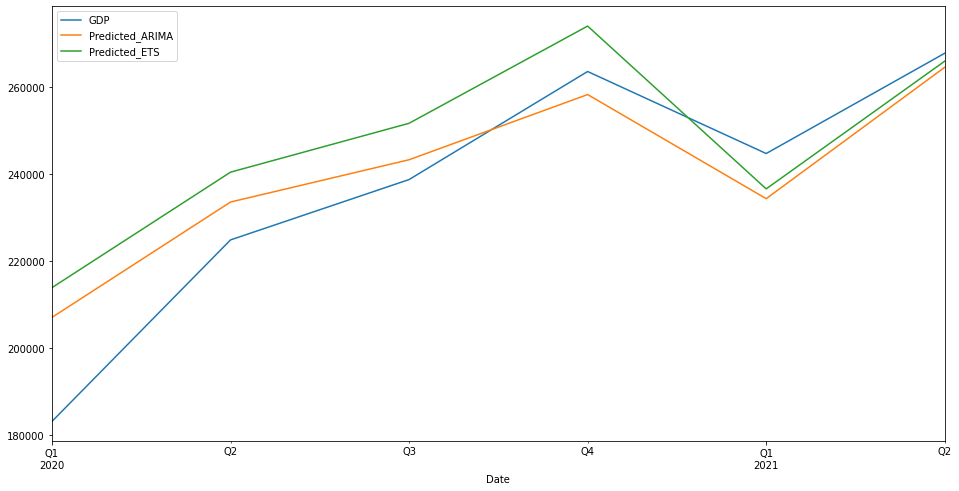

In [ ]:
test_data[['GDP', 'Predicted_ARIMA', 'Predicted_ETS']].plot(figsize=(16,8))

In [ ]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
best_SARIMAX_model, best_RMSE, best_PDQ = find_best_SARIMAX_model(train_data, test_data, best_pdq, val_col='GDP', season_period=4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, 

In [ ]:
pred_test_SARIMAX = best_SARIMAX_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
best_RMSE, best_PDQ

(17898.512024958836, (0, 0, 0))

In [ ]:
test_data['Predicted_SARIMAX'] = pred_test_SARIMAX

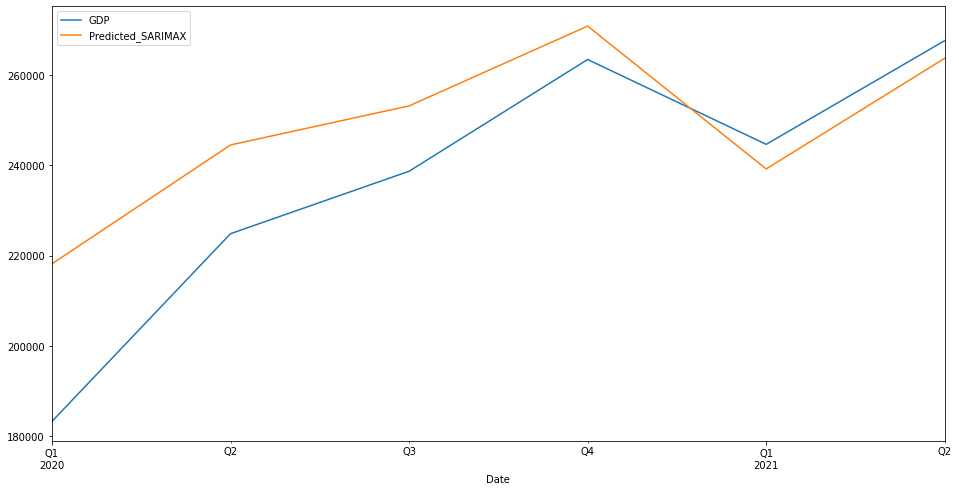

In [ ]:
test_data[['GDP', 'Predicted_SARIMAX']].plot(figsize=(16,8))

## Prophet

In [ ]:
!pip install prophet

In [ ]:
proph_train, proph_test = create_proph_train_test(train_data, test_data, date_col='Date', val_col='GDP')

In [ ]:
best_Prophet_model, best_RMSE, best_Prophet_params = find_best_Prophet_model(
    proph_train, proph_test, test_data, val_col='GDP',freq='QS')

best_Prophet_params, best_RMSE

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

(('linear', 40, 'multiplicative', 10), 15758.235719463228)

In [ ]:
best_Prophet_params

('linear', 40, 'multiplicative', 10)

In [ ]:
future = best_Prophet_model.make_future_dataframe(periods=len(proph_test), freq='QS')
forecast = best_Prophet_model.predict(future)

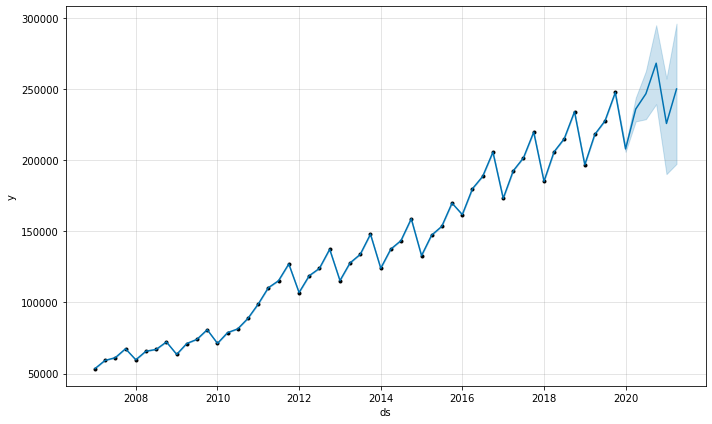

In [ ]:
fig1 = best_Prophet_model.plot(forecast)

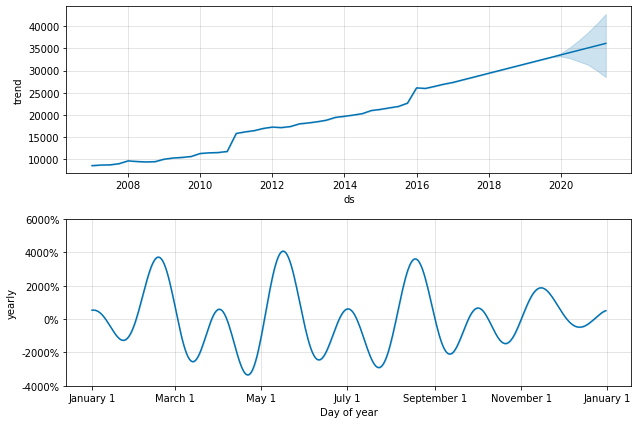

In [ ]:
fig2 = best_Prophet_model.plot_components(forecast)

In [ ]:
test_data['Predicted_Prophet'] = forecast[-(len(proph_test)):][['ds', 'yhat']].set_index('ds')

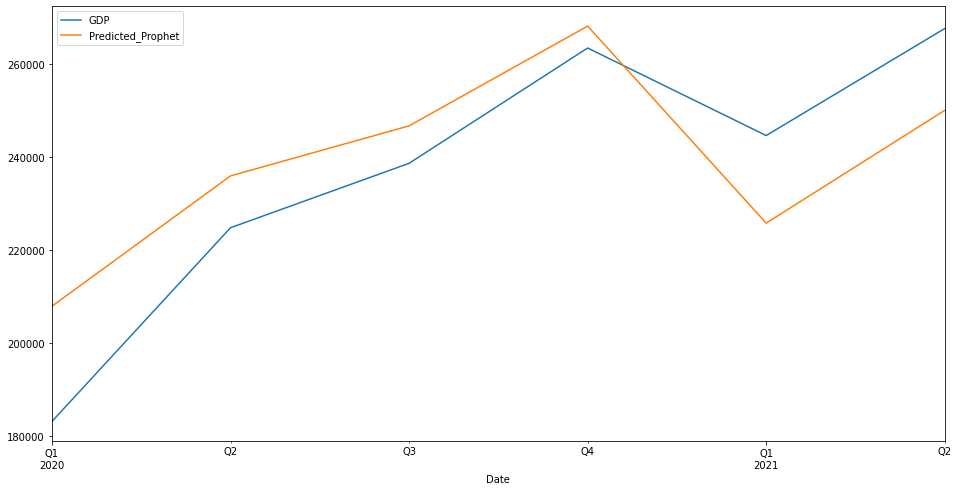

In [ ]:
test_data[['GDP', #'Predicted_ETS' , 'Predicted_ARIMA', 'Predicted_SARIMAX',
           'Predicted_Prophet']].plot(figsize=(16,8))

## Metrics

In [ ]:
timeseries_evaluation_metrics_func(test_data.GDP, test_data.Predicted_ETS)

Evaluation metric results:-
Mean Square Error is : 254926523.24038112
Mean Absolute Error is : 13254.96708741787
Root Mean Square Error is : 15966.418610332785
Mean Absolute Percentage Error is : 6.173691823489044
R2 score is : 0.6780947729918667



In [ ]:
timeseries_evaluation_metrics_func(test_data.GDP, test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 135371987.89027926
Mean Absolute Error is : 9332.365747319049
Root Mean Square Error is : 11634.946836590156
Mean Absolute Percentage Error is : 4.375629121619733
R2 score is : 0.829060742921316



In [ ]:
timeseries_evaluation_metrics_func(test_data.GDP, test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 320356732.7075961
Mean Absolute Error is : 14329.680537097578
Root Mean Square Error is : 17898.512024958836
Mean Absolute Percentage Error is : 6.740531646956578
R2 score is : 0.5954736076301403



In [ ]:
timeseries_evaluation_metrics_func(test_data.GDP, test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 248321992.99016675
Mean Absolute Error is : 14189.391187480831
Root Mean Square Error is : 15758.235719463228
Mean Absolute Percentage Error is : 6.320527607622166
R2 score is : 0.6864345596192183



### Conclusion:

The best model to predict China Real GDP is the ARIMA model as it give the smallest MSE and MAE. Also the R2 score at 0.82 positive means we could trust the result. 

The ranking of the best models are: ARIMA, Prophet, ETS and SARIMAX